# Answer Exact Match Evaluation Condensed 

# Imports

In [9]:
import os
import pandas as pd
from src.paths import DATA_DIR
import matplotlib.pyplot as plt

# Ensure dataframe has max with
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Load the API key from environment variables
api_key = os.getenv("OPENAI_API_KEY")
openai = OpenAI(api_key=api_key)

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Define paths 
Cot_prompt_path = os.path.join("..", "answer_data", "Cot_prompt.csv")
few_shot_path = os.path.join("..", "answer_data", "few_shot.csv")
llm_exp_train_path = os.path.join("..", "answer_data", "llm_exp_train_df.csv")
# train_df_fault_tol_path = os.path.join("..", "answer_data", "train_df_fault_tolerance.csv")
train_df_path = os.path.join("..", "answer_data", "train_df.csv")


# Load the files
# Cot_prompt_df = pd.read_csv(Cot_prompt_path)
# few_shot_df = pd.read_csv(few_shot_path)
# llm_exp_train_df = pd.read_csv(llm_exp_train_path)
# train_df_fault_tol_df = pd.read_csv(train_df_fault_tol_path)
# train_df = pd.read_csv(train_df_path)


In [11]:
# print(Cot_prompt_df.columns)
# print(few_shot_df.columns)
# print(llm_exp_train_df.columns)
# print(train_df_fault_tol_df.columns)
# print(train_df.columns)

In [12]:
import pandas as pd

# Load the datasets
file_paths = {
    "CoT_Prompt": Cot_prompt_path,
    "Few_Shot_Prompt": few_shot_path,
    #"LLM Experiment Train": llm_exp_train_path,
    #"Train Fault Tolerance": train_df_fault_tol_path,
    "Basic_Prompt": train_df_path
}

# Load each dataset into a dictionary of dataframes
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}
# dataframes



# Overview of differnt techniques and how they performed

## Mistake here Train fault tolerance should say 25.95%

In [13]:
# Display basic information about each dataset
df_info = {}
for name, df in dataframes.items():
    df_info[name] = {
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Missing Values": df.isnull().sum().sum(),
        "Answer Exact Match %": df['answer_exact_match'].mean() * 100 if 'answer_exact_match' in df.columns else "N/A",
    }

# Convert the summary into a DataFrame for visualization
df_summary = pd.DataFrame.from_dict(df_info, orient="index")

# Display the dataset summary to the user
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Dataset Overview", dataframe=df_summary)

Dataset Overview


# Errors by category

answer_error_category
ROUNDING                              108
DIFFERENT_DATA_OR_MAJOR_DIFFERENCE     50
SIGN_ERROR                              8
Name: count, dtype: int64


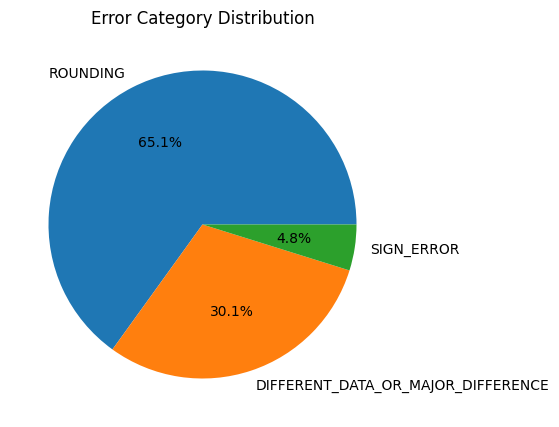

In [14]:
llm_exp = pd.read_csv(llm_exp_train_path)
llm_exp.head()

# Count per category
category_counts = llm_exp['answer_error_category'].value_counts(dropna=False)
print(category_counts)


# Pie chart
plt.figure(figsize=(5, 5))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Error Category Distribution')
plt.ylabel('')  # hide the default label
plt.show()



# Looking at individual errors per prompt technique

In [21]:
# Analyze misclassified examples where answer_exact_match is False
misclassified_dfs = {}

for name, df in dataframes.items():
    if 'answer_exact_match' in df.columns:
        misclassified_dfs[name] = df[df['answer_exact_match'] == False][['question', 'gold_answer', 'model_answer', 'program', 'answer_exact_match']]

# Display the misclassified examples
for name, misclassified_df in misclassified_dfs.items():
    if not misclassified_df.empty:
        tools.display_dataframe_to_user(name=f"Misclassified Answers - {name}", dataframe=misclassified_df)


Misclassified Answers - CoT_Prompt


Misclassified Answers - Few_Shot_Prompt


Misclassified Answers - Basic_Prompt


# Performance across datasets barchart viz

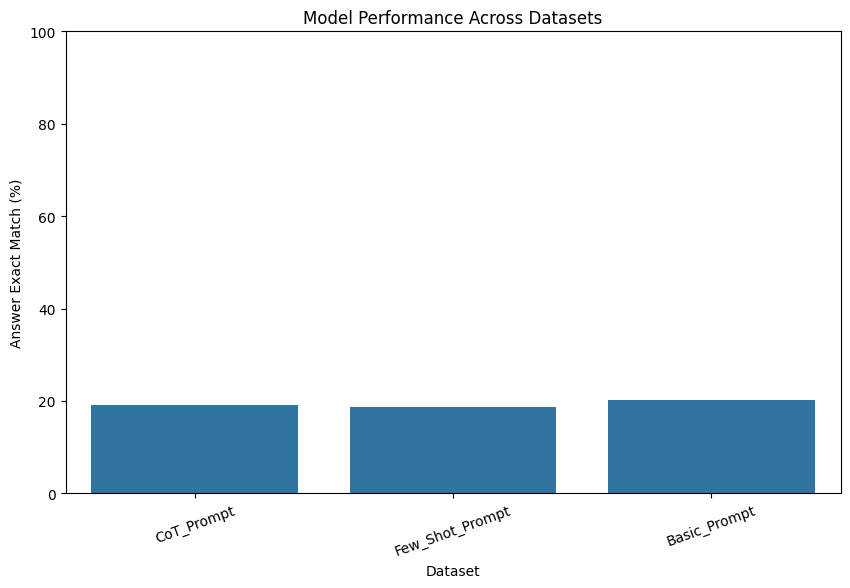

Misclassified Counts per Dataset


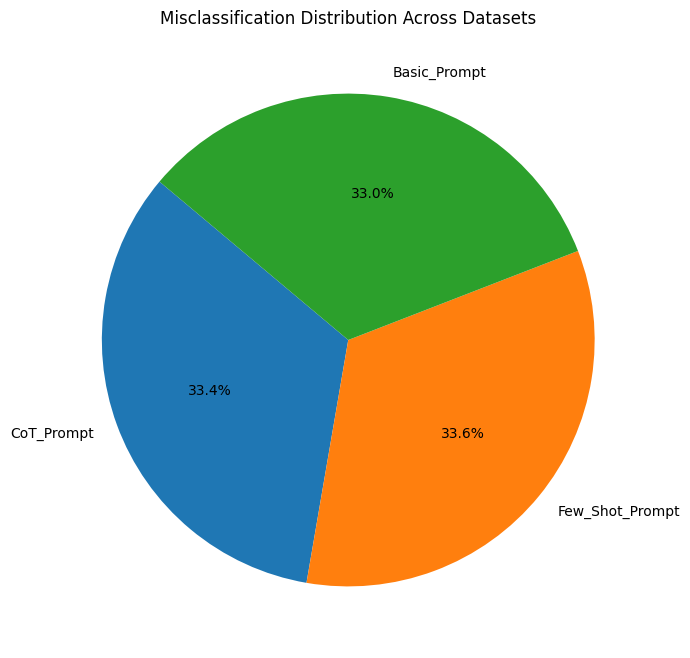

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Bar chart of Answer Exact Match % across datasets
plt.figure(figsize=(10, 6))
sns.barplot(x=df_summary.index, y=df_summary["Answer Exact Match %"])
plt.xlabel("Dataset")
plt.ylabel("Answer Exact Match (%)")
plt.title("Model Performance Across Datasets")
plt.xticks(rotation=20)
plt.ylim(0, 100)
plt.show()

# Visualization: Count of misclassified examples per dataset
misclassified_counts = {name: len(df) for name, df in misclassified_dfs.items()}
misclassified_df = pd.DataFrame.from_dict(misclassified_counts, orient="index", columns=["Misclassified Count"])

tools.display_dataframe_to_user(name="Misclassified Counts per Dataset", dataframe=misclassified_df)

# Pie Chart for Misclassification Rates
plt.figure(figsize=(8, 8))
plt.pie(misclassified_df["Misclassified Count"], labels=misclassified_df.index, autopct='%1.1f%%', startangle=140)
plt.title("Misclassification Distribution Across Datasets")
plt.show()
